# Multiclass Image Classification using CNN and transfer learning on Weather images.

In [41]:
import os
import warnings
warnings.filterwarnings('ignore')
import random
from keras.models import Model
from keras import optimizers
from keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import EfficientNetV2M
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib
import numpy as np
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import os
import cv2
import random
from shutil import copyfile
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.utils import load_img

In [3]:
pip install netron


     ---------------------------------------- 1.5/1.5 MB 8.1 MB/s eta 0:00:00


In [4]:
# Get all the paths
data_dir_list = os.listdir("C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1")
print(data_dir_list)
path, dirs, files = next(os.walk("C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1"))
file_count = len(files)
# print(file_count)

['Multi-class Weather Dataset-group1', 'Weather_image_data']


In [5]:
# Making new base directory, for creating training and test set
original_dataset_dir = 'C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1'
base_dir = 'C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1/Weather_image_data/'
os.mkdir(base_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1/Weather_image_data/'

In [6]:
#create two folders (train and test)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'test')
os.mkdir(validation_dir)

#Under train folder create four folders 
# (Cloud, Rain, Shine, Sunrise)

train_cloud_dir = os.path.join(train_dir, 'cloudy')
os.mkdir(train_cloud_dir)

train_rainy_dir = os.path.join(train_dir, 'rainy')
os.mkdir(train_rainy_dir)

train_shine_dir = os.path.join(train_dir, 'shine')
os.mkdir(train_shine_dir)

train_sunrise_dir = os.path.join(train_dir, 'sunrise')
os.mkdir(train_sunrise_dir)

#Under test folder create four folders 
# (Cloud, Rain, Shine, Sunrise)

validation_cloud_dir = os.path.join(validation_dir, 'cloudy')
os.mkdir(validation_cloud_dir)

validation_rainy_dir = os.path.join(validation_dir, 'rainy')
os.mkdir(validation_rainy_dir)

validation_shine_dir = os.path.join(validation_dir, 'shine')
os.mkdir(validation_shine_dir)

validation_sunrise_dir = os.path.join(validation_dir, 'sunrise')
os.mkdir(validation_sunrise_dir)



FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1/Weather_image_data/train'

In [5]:
#This function has been created in order to copy the images from our original data file into the new
# training and test folders we have created, we are giving 4 arguments to the function, source

def split_data(SOURCE, TRAINING, TEST, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + '/' + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    test_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    test_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + '/' + filename
        destination = TRAINING + '/' +filename
        copyfile(this_file, destination)

    for filename in test_set:
        this_file =  SOURCE + '/' + filename
        destination = TEST + '/' + filename
        copyfile(this_file, destination)

In [7]:
# The code below has been used 4 times, to create the training and testing data for the 4 seasons.

CLOUDY_SOURCE_DIR = 'C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1/Multi-class Weather Dataset-group1/Cloudy'
TRAINING_CLOUDY_DIR = 'C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1/Weather_image_data/train/cloudy'
TEST_CLOUDY_DIR = 'C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1/Weather_image_data/test/cloudy'

RAINY_SOURCE_DIR = 'C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1/Multi-class Weather Dataset-group1/Rain'
TRAINING_RAINY_DIR = 'C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1/Weather_image_data/train/rainy'
TEST_RAINY_DIR = 'C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1/Weather_image_data/test/rainy'

SHINE_SOURCE_DIR = 'C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1/Multi-class Weather Dataset-group1/Shine'
TRAINING_SHINE_DIR = 'C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1/Weather_image_data/train/shine'
TEST_SHINE_DIR = 'C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1/Weather_image_data/test/shine'

SUNRISE_SOURCE_DIR = 'C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1/Multi-class Weather Dataset-group1/Sunrise'
TRAINING_SUNRISE_DIR = 'C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1/Weather_image_data/train/sunrise'
TEST_SUNRISE_DIR = 'C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1/Weather_image_data/test/sunrise'

In [8]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [7]:
import os
import random
from shutil import copyfile

split_size = .85

split_data(CLOUDY_SOURCE_DIR, TRAINING_CLOUDY_DIR, TEST_CLOUDY_DIR, split_size)
split_data(RAINY_SOURCE_DIR, TRAINING_RAINY_DIR, TEST_RAINY_DIR, split_size)
split_data(SHINE_SOURCE_DIR, TRAINING_SHINE_DIR, TEST_SHINE_DIR, split_size)
split_data(SUNRISE_SOURCE_DIR, TRAINING_SUNRISE_DIR, TEST_SUNRISE_DIR, split_size)

# Exploratory Data

In [10]:
TRAINING_DIR = 'C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1/Weather_image_data/train'
TEST_DIR = 'C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1/Weather_image_data/test'

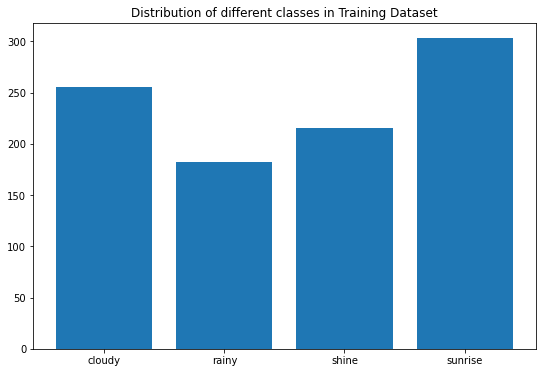

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['cloudy','rainy', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1/Weather_image_data/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [9]:
for i in ['cloudy', 'rainy', 'shine', 'sunrise']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1/Weather_image_data/train/'+i+'/'))))

Training cloudy images are: 255
Training rainy images are: 182
Training shine images are: 215
Training sunrise images are: 303


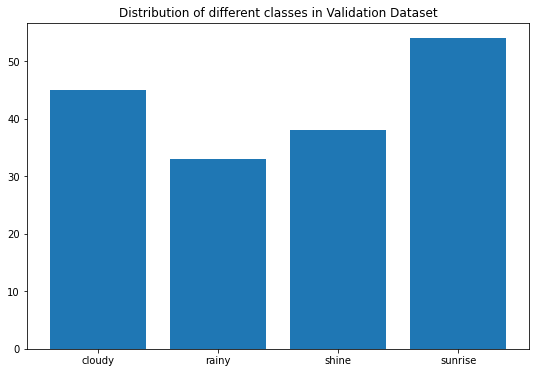

In [10]:
image_folder = ['cloudy','rainy', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1/Weather_image_data/test/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [11]:
for i in ['cloudy', 'rainy', 'shine', 'sunrise']:
    print('Test {} images are: '.format(i)+str(len(os.listdir('C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1/Weather_image_data/test/'+i+'/'))))

Test cloudy images are: 45
Test rainy images are: 33
Test shine images are: 38
Test sunrise images are: 54


# Doing Data Augmentation

In [13]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing import image

In [24]:
img_width=224; img_height=224 #We have to change the input and the output layers, as we are retaining the weights
# of only hidden or convilutional layers, but since our input image size and number of output classes
# in our case, change, we have to set them accordingly
batch_size=1
image_size=[224,224]

In [25]:
vgg16 = VGG16(input_shape=image_size + [3], weights='imagenet', include_top=False)

In [26]:
TRAINING_DIR = 'C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1/Weather_image_data/train'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 955 images belonging to 4 classes.


In [27]:
TEST_DIR = 'C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1/Weather_image_data/test'

test_datagen = ImageDataGenerator(rescale = 1/255.0)

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 170 images belonging to 4 classes.


In [28]:
for layer in vgg16.layers:
  layer.trainable = False

In [29]:
folders = glob('C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1/Weather_image_data/train*')
print(len(folders))

1


In [30]:
x = Flatten()(vgg16.output)
prediction = Dense(4, activation='softmax')(x)
model = Model(inputs=vgg16.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [31]:
from keras import optimizers
adam = optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [32]:
#Give dataset path
train_path = 'C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1/Weather_image_data/train'
test_path = 'C:/Users/Piyush/OneDrive - Lal Bahadur Shastri Institute of Management/Desktop/DLAI/Multi-class Weather Dataset-group1/Weather_image_data/test'

In [34]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 1,
                                                 class_mode = 'categorical')

Found 955 images belonging to 4 classes.


In [35]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 1,
                                            class_mode = 'categorical')

Found 170 images belonging to 4 classes.


In [36]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10

Epoch 1: val_loss improved from inf to 3.36606, saving model to mymodel.h5
5/5 - 22s - loss: 4.2070 - accuracy: 0.2000 - val_loss: 3.3661 - val_accuracy: 0.3125 - 22s/epoch - 4s/step
Epoch 2/10

Epoch 2: val_loss improved from 3.36606 to 2.19698, saving model to mymodel.h5
5/5 - 6s - loss: 2.2513 - accuracy: 0.6000 - val_loss: 2.1970 - val_accuracy: 0.2812 - 6s/epoch - 1s/step
Epoch 3/10

Epoch 3: val_loss improved from 2.19698 to 1.80293, saving model to mymodel.h5
5/5 - 7s - loss: 1.3974 - accuracy: 0.4000 - val_loss: 1.8029 - val_accuracy: 0.2812 - 7s/epoch - 1s/step
Epoch 4/10

Epoch 4: val_loss improved from 1.80293 to 1.10053, saving model to mymodel.h5
5/5 - 7s - loss: 3.0750 - accuracy: 0.0000e+00 - val_loss: 1.1005 - val_accuracy: 0.5938 - 7s/epoch - 1s/step
Epoch 5/10

Epoch 5: val_loss did not improve from 1.10053
5/5 - 5s - loss: 1.0920 - accuracy: 0.6000 - val_loss: 2.7054 - val_accuracy: 0.2812 - 5s/epoch - 1s/step
Epoch 6/10

Epoch 6: val_loss did not improve

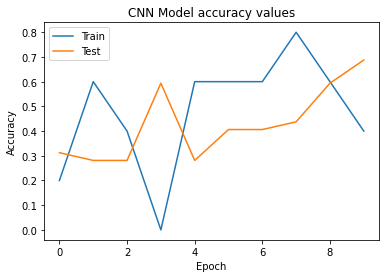

In [37]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Using EfficientNetV2L

In [52]:
effv2m = tf.keras.applications.EfficientNetV2M(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=[224,224,3],
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    include_preprocessing=True,
)

In [53]:
for layer in effv2m.layers:
  layer.trainable = False

In [54]:
import tensorflow as tf

In [50]:
tf.keras.applications.EfficientNetV2M(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=[224,224,3],
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    include_preprocessing=True,
)

In [55]:
x = Flatten()(effv2m.output)
prediction = Dense(4, activation='softmax')(x)
model5 = Model(inputs= effv2m.input, outputs=prediction)
model5.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_5 (Rescaling)        (None, 224, 224, 3)  0           ['input_9[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 24  648         ['rescaling_5[0][0]']            
                                )                                                                 
                                                                                            

                                                                 ']                               
                                                                                                  
 block2b_project_bn (BatchNorma  (None, 56, 56, 48)  192         ['block2b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_drop (Dropout)         (None, 56, 56, 48)   0           ['block2b_project_bn[0][0]']     
                                                                                                  
 block2b_add (Add)              (None, 56, 56, 48)   0           ['block2b_drop[0][0]',           
                                                                  'block2a_project_bn[0][0]']     
                                                                                                  
 block2c_e

 block3b_expand_bn (BatchNormal  (None, 28, 28, 320)  1280       ['block3b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 320)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_project_conv (Conv2D)  (None, 28, 28, 80)   25600       ['block3b_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block3b_project_bn (BatchNorma  (None, 28, 28, 80)  320         ['block3b_project_conv[0][0]']   
 lization)

 2D)                                                             ']                               
                                                                                                  
 block4a_bn (BatchNormalization  (None, 14, 14, 320)  1280       ['block4a_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block4a_activation (Activation  (None, 14, 14, 320)  0          ['block4a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4a_se_squeeze (GlobalAver  (None, 320)         0           ['block4a_activation[0][0]']     
 agePooling2D)                                                                                    
          

                                                                                                  
 block4c_se_reshape (Reshape)   (None, 1, 1, 640)    0           ['block4c_se_squeeze[0][0]']     
                                                                                                  
 block4c_se_reduce (Conv2D)     (None, 1, 1, 40)     25640       ['block4c_se_reshape[0][0]']     
                                                                                                  
 block4c_se_expand (Conv2D)     (None, 1, 1, 640)    26240       ['block4c_se_reduce[0][0]']      
                                                                                                  
 block4c_se_excite (Multiply)   (None, 14, 14, 640)  0           ['block4c_activation[0][0]',     
                                                                  'block4c_se_expand[0][0]']      
                                                                                                  
 block4c_p

 block4e_se_expand (Conv2D)     (None, 1, 1, 640)    26240       ['block4e_se_reduce[0][0]']      
                                                                                                  
 block4e_se_excite (Multiply)   (None, 14, 14, 640)  0           ['block4e_activation[0][0]',     
                                                                  'block4e_se_expand[0][0]']      
                                                                                                  
 block4e_project_conv (Conv2D)  (None, 14, 14, 160)  102400      ['block4e_se_excite[0][0]']      
                                                                                                  
 block4e_project_bn (BatchNorma  (None, 14, 14, 160)  640        ['block4e_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4e_d

 block4g_project_conv (Conv2D)  (None, 14, 14, 160)  102400      ['block4g_se_excite[0][0]']      
                                                                                                  
 block4g_project_bn (BatchNorma  (None, 14, 14, 160)  640        ['block4g_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4g_drop (Dropout)         (None, 14, 14, 160)  0           ['block4g_project_bn[0][0]']     
                                                                                                  
 block4g_add (Add)              (None, 14, 14, 160)  0           ['block4g_drop[0][0]',           
                                                                  'block4f_add[0][0]']            
                                                                                                  
 block5a_e

                                                                                                  
 block5c_expand_conv (Conv2D)   (None, 14, 14, 1056  185856      ['block5b_add[0][0]']            
                                )                                                                 
                                                                                                  
 block5c_expand_bn (BatchNormal  (None, 14, 14, 1056  4224       ['block5c_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block5c_expand_activation (Act  (None, 14, 14, 1056  0          ['block5c_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block5c_d

                                                                                                  
 block5e_expand_bn (BatchNormal  (None, 14, 14, 1056  4224       ['block5e_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block5e_expand_activation (Act  (None, 14, 14, 1056  0          ['block5e_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block5e_dwconv2 (DepthwiseConv  (None, 14, 14, 1056  9504       ['block5e_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block5e_b

                                                                                                  
 block5g_expand_activation (Act  (None, 14, 14, 1056  0          ['block5g_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block5g_dwconv2 (DepthwiseConv  (None, 14, 14, 1056  9504       ['block5g_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block5g_bn (BatchNormalization  (None, 14, 14, 1056  4224       ['block5g_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block5g_a

                                                                                                  
 block5i_dwconv2 (DepthwiseConv  (None, 14, 14, 1056  9504       ['block5i_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block5i_bn (BatchNormalization  (None, 14, 14, 1056  4224       ['block5i_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block5i_activation (Activation  (None, 14, 14, 1056  0          ['block5i_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block5i_s

                                                                                                  
 block5k_bn (BatchNormalization  (None, 14, 14, 1056  4224       ['block5k_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block5k_activation (Activation  (None, 14, 14, 1056  0          ['block5k_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block5k_se_squeeze (GlobalAver  (None, 1056)        0           ['block5k_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5k_s

                                                                                                  
 block5m_activation (Activation  (None, 14, 14, 1056  0          ['block5m_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block5m_se_squeeze (GlobalAver  (None, 1056)        0           ['block5m_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5m_se_reshape (Reshape)   (None, 1, 1, 1056)   0           ['block5m_se_squeeze[0][0]']     
                                                                                                  
 block5m_se_reduce (Conv2D)     (None, 1, 1, 44)     46508       ['block5m_se_reshape[0][0]']     
          

                                                                                                  
 block6a_se_squeeze (GlobalAver  (None, 1056)        0           ['block6a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6a_se_reshape (Reshape)   (None, 1, 1, 1056)   0           ['block6a_se_squeeze[0][0]']     
                                                                                                  
 block6a_se_reduce (Conv2D)     (None, 1, 1, 44)     46508       ['block6a_se_reshape[0][0]']     
                                                                                                  
 block6a_se_expand (Conv2D)     (None, 1, 1, 1056)   47520       ['block6a_se_reduce[0][0]']      
                                                                                                  
 block6a_s

 block6c_se_excite (Multiply)   (None, 7, 7, 1824)   0           ['block6c_activation[0][0]',     
                                                                  'block6c_se_expand[0][0]']      
                                                                                                  
 block6c_project_conv (Conv2D)  (None, 7, 7, 304)    554496      ['block6c_se_excite[0][0]']      
                                                                                                  
 block6c_project_bn (BatchNorma  (None, 7, 7, 304)   1216        ['block6c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6c_drop (Dropout)         (None, 7, 7, 304)    0           ['block6c_project_bn[0][0]']     
                                                                                                  
 block6c_a

 block6e_project_bn (BatchNorma  (None, 7, 7, 304)   1216        ['block6e_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6e_drop (Dropout)         (None, 7, 7, 304)    0           ['block6e_project_bn[0][0]']     
                                                                                                  
 block6e_add (Add)              (None, 7, 7, 304)    0           ['block6e_drop[0][0]',           
                                                                  'block6d_add[0][0]']            
                                                                                                  
 block6f_expand_conv (Conv2D)   (None, 7, 7, 1824)   554496      ['block6e_add[0][0]']            
                                                                                                  
 block6f_e

 block6g_add (Add)              (None, 7, 7, 304)    0           ['block6g_drop[0][0]',           
                                                                  'block6f_add[0][0]']            
                                                                                                  
 block6h_expand_conv (Conv2D)   (None, 7, 7, 1824)   554496      ['block6g_add[0][0]']            
                                                                                                  
 block6h_expand_bn (BatchNormal  (None, 7, 7, 1824)  7296        ['block6h_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6h_expand_activation (Act  (None, 7, 7, 1824)  0           ['block6h_expand_bn[0][0]']      
 ivation)                                                                                         
          

 block6j_expand_bn (BatchNormal  (None, 7, 7, 1824)  7296        ['block6j_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6j_expand_activation (Act  (None, 7, 7, 1824)  0           ['block6j_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6j_dwconv2 (DepthwiseConv  (None, 7, 7, 1824)  16416       ['block6j_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block6j_bn (BatchNormalization  (None, 7, 7, 1824)  7296        ['block6j_dwconv2[0][0]']        
 )        

                                                                                                  
 block6l_dwconv2 (DepthwiseConv  (None, 7, 7, 1824)  16416       ['block6l_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block6l_bn (BatchNormalization  (None, 7, 7, 1824)  7296        ['block6l_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block6l_activation (Activation  (None, 7, 7, 1824)  0           ['block6l_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6l_s

 )                                                                                                
                                                                                                  
 block6n_activation (Activation  (None, 7, 7, 1824)  0           ['block6n_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6n_se_squeeze (GlobalAver  (None, 1824)        0           ['block6n_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6n_se_reshape (Reshape)   (None, 1, 1, 1824)   0           ['block6n_se_squeeze[0][0]']     
                                                                                                  
 block6n_s

 block6p_se_squeeze (GlobalAver  (None, 1824)        0           ['block6p_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6p_se_reshape (Reshape)   (None, 1, 1, 1824)   0           ['block6p_se_squeeze[0][0]']     
                                                                                                  
 block6p_se_reduce (Conv2D)     (None, 1, 1, 76)     138700      ['block6p_se_reshape[0][0]']     
                                                                                                  
 block6p_se_expand (Conv2D)     (None, 1, 1, 1824)   140448      ['block6p_se_reduce[0][0]']      
                                                                                                  
 block6p_se_excite (Multiply)   (None, 7, 7, 1824)   0           ['block6p_activation[0][0]',     
          

 block6r_se_reduce (Conv2D)     (None, 1, 1, 76)     138700      ['block6r_se_reshape[0][0]']     
                                                                                                  
 block6r_se_expand (Conv2D)     (None, 1, 1, 1824)   140448      ['block6r_se_reduce[0][0]']      
                                                                                                  
 block6r_se_excite (Multiply)   (None, 7, 7, 1824)   0           ['block6r_activation[0][0]',     
                                                                  'block6r_se_expand[0][0]']      
                                                                                                  
 block6r_project_conv (Conv2D)  (None, 7, 7, 304)    554496      ['block6r_se_excite[0][0]']      
                                                                                                  
 block6r_project_bn (BatchNorma  (None, 7, 7, 304)   1216        ['block6r_project_conv[0][0]']   
 lization)

 lization)                                                                                        
                                                                                                  
 block7b_drop (Dropout)         (None, 7, 7, 512)    0           ['block7b_project_bn[0][0]']     
                                                                                                  
 block7b_add (Add)              (None, 7, 7, 512)    0           ['block7b_drop[0][0]',           
                                                                  'block7a_project_bn[0][0]']     
                                                                                                  
 block7c_expand_conv (Conv2D)   (None, 7, 7, 3072)   1572864     ['block7b_add[0][0]']            
                                                                                                  
 block7c_expand_bn (BatchNormal  (None, 7, 7, 3072)  12288       ['block7c_expand_conv[0][0]']    
 ization) 

                                                                  'block7c_add[0][0]']            
                                                                                                  
 block7e_expand_conv (Conv2D)   (None, 7, 7, 3072)   1572864     ['block7d_add[0][0]']            
                                                                                                  
 block7e_expand_bn (BatchNormal  (None, 7, 7, 3072)  12288       ['block7e_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7e_expand_activation (Act  (None, 7, 7, 3072)  0           ['block7e_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7e_d

In [56]:
from keras import optimizers
adam = optimizers.Adam()
model5.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [57]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model5_history=model5.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10

Epoch 1: val_loss improved from inf to 30.86005, saving model to mymodel.h5
5/5 - 41s - loss: 38.0586 - accuracy: 0.0000e+00 - val_loss: 30.8600 - val_accuracy: 0.1875 - 41s/epoch - 8s/step
Epoch 2/10

Epoch 2: val_loss did not improve from 30.86005
5/5 - 8s - loss: 72.4495 - accuracy: 0.2000 - val_loss: 61.1427 - val_accuracy: 0.3125 - 8s/epoch - 2s/step
Epoch 3/10

Epoch 3: val_loss improved from 30.86005 to 11.74672, saving model to mymodel.h5
5/5 - 9s - loss: 69.3359 - accuracy: 0.2000 - val_loss: 11.7467 - val_accuracy: 0.2188 - 9s/epoch - 2s/step
Epoch 4/10

Epoch 4: val_loss did not improve from 11.74672
5/5 - 8s - loss: 18.0140 - accuracy: 0.2000 - val_loss: 20.3809 - val_accuracy: 0.3125 - 8s/epoch - 2s/step
Epoch 5/10

Epoch 5: val_loss did not improve from 11.74672
5/5 - 8s - loss: 6.7587 - accuracy: 0.8000 - val_loss: 20.2594 - val_accuracy: 0.2500 - 8s/epoch - 2s/step
Epoch 6/10

Epoch 6: val_loss did not improve from 11.74672
5/5 - 8s - loss: 11.1805 - accurac

# V2LNet

In [58]:
effv2l = tf.keras.applications.EfficientNetV2L(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=[224,224,3],
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    include_preprocessing=True,
)

In [60]:
for layer in effv2l.layers:
  layer.trainable = False

In [61]:
x = Flatten()(effv2l.output)
prediction = Dense(4, activation='softmax')(x)
model6 = Model(inputs= effv2l.input, outputs=prediction)
model6.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_6 (Rescaling)        (None, 224, 224, 3)  0           ['input_10[0][0]']               
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['rescaling_6[0][0]']            
                                )                                                                 
                                                                                            

 block2a_project_conv (Conv2D)  (None, 56, 56, 64)   8192        ['block2a_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 56, 56, 64)  256         ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 56, 56, 256)  147456      ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 56, 56, 256)  1024       ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block2f_expand_bn (BatchNormal  (None, 56, 56, 256)  1024       ['block2f_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2f_expand_activation (Act  (None, 56, 56, 256)  0          ['block2f_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2f_project_conv (Conv2D)  (None, 56, 56, 64)   16384       ['block2f_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block2f_p

                                                                                                  
 block3c_drop (Dropout)         (None, 28, 28, 96)   0           ['block3c_project_bn[0][0]']     
                                                                                                  
 block3c_add (Add)              (None, 28, 28, 96)   0           ['block3c_drop[0][0]',           
                                                                  'block3b_add[0][0]']            
                                                                                                  
 block3d_expand_conv (Conv2D)   (None, 28, 28, 384)  331776      ['block3c_add[0][0]']            
                                                                                                  
 block3d_expand_bn (BatchNormal  (None, 28, 28, 384)  1536       ['block3d_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block4a_expand_bn (BatchNormal  (None, 28, 28, 384)  1536       ['block4a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4a_expand_activation (Act  (None, 28, 28, 384)  0          ['block4a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4a_dwconv2 (DepthwiseConv  (None, 14, 14, 384)  3456       ['block4a_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block4a_b

 block4c_bn (BatchNormalization  (None, 14, 14, 768)  3072       ['block4c_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block4c_activation (Activation  (None, 14, 14, 768)  0          ['block4c_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4c_se_squeeze (GlobalAver  (None, 768)         0           ['block4c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4c_se_reshape (Reshape)   (None, 1, 1, 768)    0           ['block4c_se_squeeze[0][0]']     
          

                                                                                                  
 block4e_se_squeeze (GlobalAver  (None, 768)         0           ['block4e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4e_se_reshape (Reshape)   (None, 1, 1, 768)    0           ['block4e_se_squeeze[0][0]']     
                                                                                                  
 block4e_se_reduce (Conv2D)     (None, 1, 1, 48)     36912       ['block4e_se_reshape[0][0]']     
                                                                                                  
 block4e_se_expand (Conv2D)     (None, 1, 1, 768)    37632       ['block4e_se_reduce[0][0]']      
                                                                                                  
 block4e_s

                                                                                                  
 block4g_se_reduce (Conv2D)     (None, 1, 1, 48)     36912       ['block4g_se_reshape[0][0]']     
                                                                                                  
 block4g_se_expand (Conv2D)     (None, 1, 1, 768)    37632       ['block4g_se_reduce[0][0]']      
                                                                                                  
 block4g_se_excite (Multiply)   (None, 14, 14, 768)  0           ['block4g_activation[0][0]',     
                                                                  'block4g_se_expand[0][0]']      
                                                                                                  
 block4g_project_conv (Conv2D)  (None, 14, 14, 192)  147456      ['block4g_se_excite[0][0]']      
                                                                                                  
 block4g_p

 block4i_se_excite (Multiply)   (None, 14, 14, 768)  0           ['block4i_activation[0][0]',     
                                                                  'block4i_se_expand[0][0]']      
                                                                                                  
 block4i_project_conv (Conv2D)  (None, 14, 14, 192)  147456      ['block4i_se_excite[0][0]']      
                                                                                                  
 block4i_project_bn (BatchNorma  (None, 14, 14, 192)  768        ['block4i_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4i_drop (Dropout)         (None, 14, 14, 192)  0           ['block4i_project_bn[0][0]']     
                                                                                                  
 block4i_a

                                                                                                  
 block5a_project_bn (BatchNorma  (None, 14, 14, 224)  896        ['block5a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5b_expand_conv (Conv2D)   (None, 14, 14, 1344  301056      ['block5a_project_bn[0][0]']     
                                )                                                                 
                                                                                                  
 block5b_expand_bn (BatchNormal  (None, 14, 14, 1344  5376       ['block5b_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block5b_e

                                                                                                  
 block5d_expand_conv (Conv2D)   (None, 14, 14, 1344  301056      ['block5c_add[0][0]']            
                                )                                                                 
                                                                                                  
 block5d_expand_bn (BatchNormal  (None, 14, 14, 1344  5376       ['block5d_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block5d_expand_activation (Act  (None, 14, 14, 1344  0          ['block5d_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block5d_d

                                                                                                  
 block5f_expand_bn (BatchNormal  (None, 14, 14, 1344  5376       ['block5f_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block5f_expand_activation (Act  (None, 14, 14, 1344  0          ['block5f_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block5f_dwconv2 (DepthwiseConv  (None, 14, 14, 1344  12096      ['block5f_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block5f_b

                                                                                                  
 block5h_expand_activation (Act  (None, 14, 14, 1344  0          ['block5h_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block5h_dwconv2 (DepthwiseConv  (None, 14, 14, 1344  12096      ['block5h_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block5h_bn (BatchNormalization  (None, 14, 14, 1344  5376       ['block5h_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block5h_a

                                                                                                  
 block5j_dwconv2 (DepthwiseConv  (None, 14, 14, 1344  12096      ['block5j_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block5j_bn (BatchNormalization  (None, 14, 14, 1344  5376       ['block5j_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block5j_activation (Activation  (None, 14, 14, 1344  0          ['block5j_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block5j_s

                                                                                                  
 block5l_bn (BatchNormalization  (None, 14, 14, 1344  5376       ['block5l_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block5l_activation (Activation  (None, 14, 14, 1344  0          ['block5l_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block5l_se_squeeze (GlobalAver  (None, 1344)        0           ['block5l_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5l_s

                                                                                                  
 block5n_activation (Activation  (None, 14, 14, 1344  0          ['block5n_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block5n_se_squeeze (GlobalAver  (None, 1344)        0           ['block5n_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5n_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5n_se_squeeze[0][0]']     
                                                                                                  
 block5n_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block5n_se_reshape[0][0]']     
          

                                                                                                  
 block5p_se_squeeze (GlobalAver  (None, 1344)        0           ['block5p_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5p_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5p_se_squeeze[0][0]']     
                                                                                                  
 block5p_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block5p_se_reshape[0][0]']     
                                                                                                  
 block5p_se_expand (Conv2D)     (None, 1, 1, 1344)   76608       ['block5p_se_reduce[0][0]']      
                                                                                                  
 block5p_s

                                                                                                  
 block5r_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5r_se_squeeze[0][0]']     
                                                                                                  
 block5r_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block5r_se_reshape[0][0]']     
                                                                                                  
 block5r_se_expand (Conv2D)     (None, 1, 1, 1344)   76608       ['block5r_se_reduce[0][0]']      
                                                                                                  
 block5r_se_excite (Multiply)   (None, 14, 14, 1344  0           ['block5r_activation[0][0]',     
                                )                                 'block5r_se_expand[0][0]']      
                                                                                                  
 block5r_p

 block6a_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block6a_se_reshape[0][0]']     
                                                                                                  
 block6a_se_expand (Conv2D)     (None, 1, 1, 1344)   76608       ['block6a_se_reduce[0][0]']      
                                                                                                  
 block6a_se_excite (Multiply)   (None, 7, 7, 1344)   0           ['block6a_activation[0][0]',     
                                                                  'block6a_se_expand[0][0]']      
                                                                                                  
 block6a_project_conv (Conv2D)  (None, 7, 7, 384)    516096      ['block6a_se_excite[0][0]']      
                                                                                                  
 block6a_project_bn (BatchNorma  (None, 7, 7, 384)   1536        ['block6a_project_conv[0][0]']   
 lization)

 lization)                                                                                        
                                                                                                  
 block6c_drop (Dropout)         (None, 7, 7, 384)    0           ['block6c_project_bn[0][0]']     
                                                                                                  
 block6c_add (Add)              (None, 7, 7, 384)    0           ['block6c_drop[0][0]',           
                                                                  'block6b_add[0][0]']            
                                                                                                  
 block6d_expand_conv (Conv2D)   (None, 7, 7, 2304)   884736      ['block6c_add[0][0]']            
                                                                                                  
 block6d_expand_bn (BatchNormal  (None, 7, 7, 2304)  9216        ['block6d_expand_conv[0][0]']    
 ization) 

                                                                  'block6d_add[0][0]']            
                                                                                                  
 block6f_expand_conv (Conv2D)   (None, 7, 7, 2304)   884736      ['block6e_add[0][0]']            
                                                                                                  
 block6f_expand_bn (BatchNormal  (None, 7, 7, 2304)  9216        ['block6f_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6f_expand_activation (Act  (None, 7, 7, 2304)  0           ['block6f_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6f_d

 ization)                                                                                         
                                                                                                  
 block6h_expand_activation (Act  (None, 7, 7, 2304)  0           ['block6h_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6h_dwconv2 (DepthwiseConv  (None, 7, 7, 2304)  20736       ['block6h_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block6h_bn (BatchNormalization  (None, 7, 7, 2304)  9216        ['block6h_dwconv2[0][0]']        
 )                                                                                                
          

 block6j_dwconv2 (DepthwiseConv  (None, 7, 7, 2304)  20736       ['block6j_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block6j_bn (BatchNormalization  (None, 7, 7, 2304)  9216        ['block6j_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block6j_activation (Activation  (None, 7, 7, 2304)  0           ['block6j_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6j_se_squeeze (GlobalAver  (None, 2304)        0           ['block6j_activation[0][0]']     
 agePoolin

                                                                                                  
 block6l_activation (Activation  (None, 7, 7, 2304)  0           ['block6l_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6l_se_squeeze (GlobalAver  (None, 2304)        0           ['block6l_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6l_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6l_se_squeeze[0][0]']     
                                                                                                  
 block6l_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6l_se_reshape[0][0]']     
          

 agePooling2D)                                                                                    
                                                                                                  
 block6n_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6n_se_squeeze[0][0]']     
                                                                                                  
 block6n_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6n_se_reshape[0][0]']     
                                                                                                  
 block6n_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6n_se_reduce[0][0]']      
                                                                                                  
 block6n_se_excite (Multiply)   (None, 7, 7, 2304)   0           ['block6n_activation[0][0]',     
                                                                  'block6n_se_expand[0][0]']      
          

                                                                                                  
 block6p_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6p_se_reduce[0][0]']      
                                                                                                  
 block6p_se_excite (Multiply)   (None, 7, 7, 2304)   0           ['block6p_activation[0][0]',     
                                                                  'block6p_se_expand[0][0]']      
                                                                                                  
 block6p_project_conv (Conv2D)  (None, 7, 7, 384)    884736      ['block6p_se_excite[0][0]']      
                                                                                                  
 block6p_project_bn (BatchNorma  (None, 7, 7, 384)   1536        ['block6p_project_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 block6r_project_conv (Conv2D)  (None, 7, 7, 384)    884736      ['block6r_se_excite[0][0]']      
                                                                                                  
 block6r_project_bn (BatchNorma  (None, 7, 7, 384)   1536        ['block6r_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6r_drop (Dropout)         (None, 7, 7, 384)    0           ['block6r_project_bn[0][0]']     
                                                                                                  
 block6r_add (Add)              (None, 7, 7, 384)    0           ['block6r_drop[0][0]',           
                                                                  'block6q_add[0][0]']            
          

                                                                                                  
 block6t_drop (Dropout)         (None, 7, 7, 384)    0           ['block6t_project_bn[0][0]']     
                                                                                                  
 block6t_add (Add)              (None, 7, 7, 384)    0           ['block6t_drop[0][0]',           
                                                                  'block6s_add[0][0]']            
                                                                                                  
 block6u_expand_conv (Conv2D)   (None, 7, 7, 2304)   884736      ['block6t_add[0][0]']            
                                                                                                  
 block6u_expand_bn (BatchNormal  (None, 7, 7, 2304)  9216        ['block6u_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block6w_expand_conv (Conv2D)   (None, 7, 7, 2304)   884736      ['block6v_add[0][0]']            
                                                                                                  
 block6w_expand_bn (BatchNormal  (None, 7, 7, 2304)  9216        ['block6w_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6w_expand_activation (Act  (None, 7, 7, 2304)  0           ['block6w_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6w_dwconv2 (DepthwiseConv  (None, 7, 7, 2304)  20736       ['block6w_expand_activation[0][0]
 2D)      

                                                                                                  
 block6y_expand_activation (Act  (None, 7, 7, 2304)  0           ['block6y_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6y_dwconv2 (DepthwiseConv  (None, 7, 7, 2304)  20736       ['block6y_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block6y_bn (BatchNormalization  (None, 7, 7, 2304)  9216        ['block6y_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block6y_a

 block7b_activation (Activation  (None, 7, 7, 3840)  0           ['block7b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block7b_se_squeeze (GlobalAver  (None, 3840)        0           ['block7b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block7b_se_reshape (Reshape)   (None, 1, 1, 3840)   0           ['block7b_se_squeeze[0][0]']     
                                                                                                  
 block7b_se_reduce (Conv2D)     (None, 1, 1, 160)    614560      ['block7b_se_reshape[0][0]']     
                                                                                                  
 block7b_s

                                                                                                  
 block7d_se_reshape (Reshape)   (None, 1, 1, 3840)   0           ['block7d_se_squeeze[0][0]']     
                                                                                                  
 block7d_se_reduce (Conv2D)     (None, 1, 1, 160)    614560      ['block7d_se_reshape[0][0]']     
                                                                                                  
 block7d_se_expand (Conv2D)     (None, 1, 1, 3840)   618240      ['block7d_se_reduce[0][0]']      
                                                                                                  
 block7d_se_excite (Multiply)   (None, 7, 7, 3840)   0           ['block7d_activation[0][0]',     
                                                                  'block7d_se_expand[0][0]']      
                                                                                                  
 block7d_p

 block7f_se_expand (Conv2D)     (None, 1, 1, 3840)   618240      ['block7f_se_reduce[0][0]']      
                                                                                                  
 block7f_se_excite (Multiply)   (None, 7, 7, 3840)   0           ['block7f_activation[0][0]',     
                                                                  'block7f_se_expand[0][0]']      
                                                                                                  
 block7f_project_conv (Conv2D)  (None, 7, 7, 640)    2457600     ['block7f_se_excite[0][0]']      
                                                                                                  
 block7f_project_bn (BatchNorma  (None, 7, 7, 640)   2560        ['block7f_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block7f_d

In [62]:
from keras import optimizers
adam = optimizers.Adam()
model6.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [63]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model5_history=model5.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10

Epoch 1: val_loss improved from inf to 5.04028, saving model to mymodel.h5
5/5 - 9s - loss: 29.4206 - accuracy: 0.2000 - val_loss: 5.0403 - val_accuracy: 0.1875 - 9s/epoch - 2s/step
Epoch 2/10

Epoch 2: val_loss did not improve from 5.04028
5/5 - 7s - loss: 16.0591 - accuracy: 0.2000 - val_loss: 29.3794 - val_accuracy: 0.2188 - 7s/epoch - 1s/step
Epoch 3/10

Epoch 3: val_loss did not improve from 5.04028
5/5 - 8s - loss: 15.0688 - accuracy: 0.0000e+00 - val_loss: 6.8033 - val_accuracy: 0.2812 - 8s/epoch - 2s/step
Epoch 4/10

Epoch 4: val_loss improved from 5.04028 to 4.57835, saving model to mymodel.h5
5/5 - 9s - loss: 11.5562 - accuracy: 0.4000 - val_loss: 4.5784 - val_accuracy: 0.2500 - 9s/epoch - 2s/step
Epoch 5/10

Epoch 5: val_loss did not improve from 4.57835
5/5 - 8s - loss: 10.4327 - accuracy: 0.2000 - val_loss: 18.6598 - val_accuracy: 0.2188 - 8s/epoch - 2s/step
Epoch 6/10

Epoch 6: val_loss did not improve from 4.57835
5/5 - 7s - loss: 15.3040 - accuracy: 0.4000 -